# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [47]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 9]

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

               Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000011972FD0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000011652710>]], dtype=object)

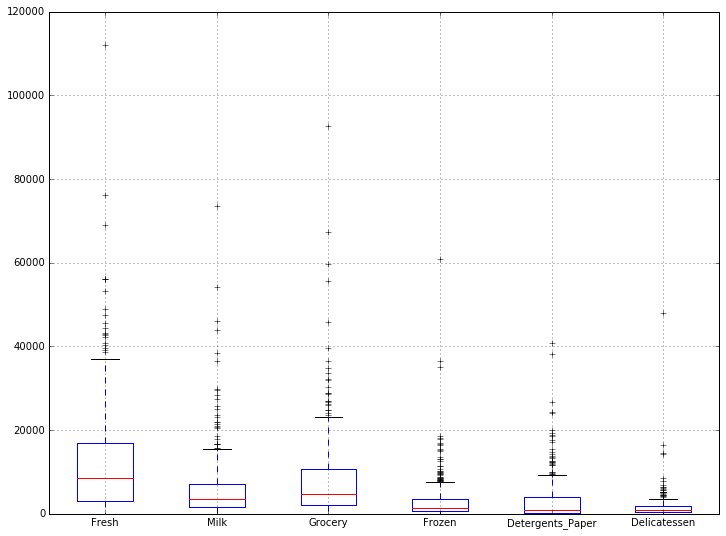

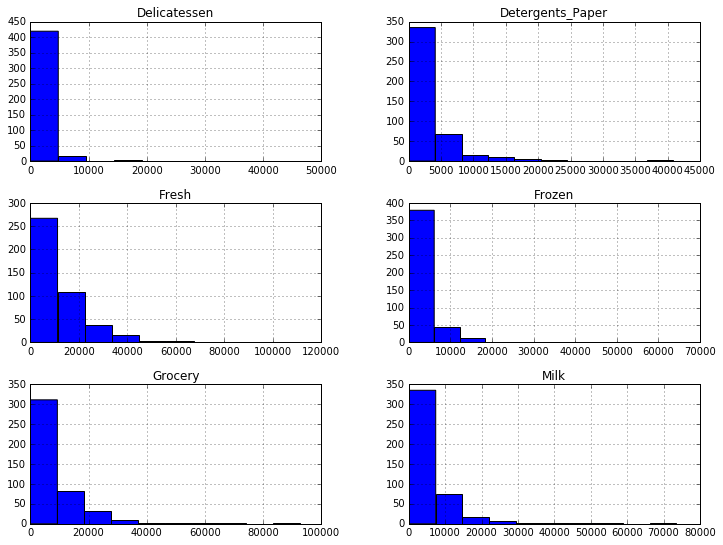

In [48]:
print data.describe()
data.boxplot(return_type="axes")
data.hist()

Answer:
PCA uses vectors with maximum variance as its first dimensions, ICA finds vectors that are statistically independent. Features with higher variance expected to have higher weight in PCA vectors. <br>The boxplot shows that “Fresh” and “Grocery” features have the highest variance, these features will probably have higher weights in main PCA vectors. <br>The ICA is usually used to separate mixed signals from several sensors. In this case it can be used to find dependencies between the features: products that tend to be sold together or have negative correlation. Similar products like Fresh and Grocery might appear dependent in ICA analysis and products like Detergents and Fresh will likely show no or negative correlation.

###PCA

      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0 -0.976537 -0.121184 -0.061540 -0.152365          0.007054     -0.068105
1 -0.110614  0.515802  0.764606 -0.018723          0.365351      0.057079
2 -0.178557  0.509887 -0.275781  0.714200         -0.204410      0.283217
3 -0.041876 -0.645640  0.375460  0.646292          0.149380     -0.020396
4  0.015986  0.203236 -0.160292  0.220186          0.207930     -0.917077
5 -0.015763  0.033492  0.410939 -0.013289         -0.871284     -0.265417
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


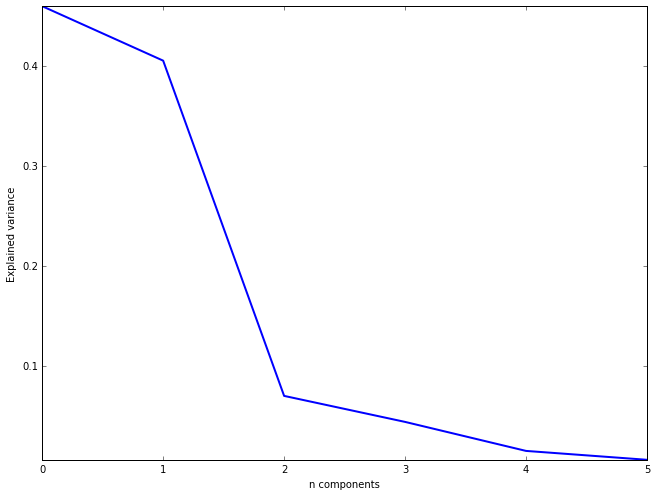

In [49]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
from sklearn import preprocessing

pca = PCA(n_components=6)
pca.fit_transform(data)

# Print the components and the amount of variance in the data contained in each dimension
pca_components = pd.DataFrame(pca.components_)
pca_components.columns = ["Fresh", "Milk", "Grocery", "Frozen", 
                          "Detergents_Paper", "Delicatessen"]
print pca_components
print pca.explained_variance_ratio_

# Explained variance plot
plt.figure()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n components')
plt.ylabel('Explained variance')

**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: 
The variance seems to drop off significantly after the second dimension, using only two dimensions is the most optimal choice for this problem. It doesn’t seem practical to use higher number of dimensions for segmenting this small dataset with large amount of outliers.

**3)** What do the dimensions seem to represent? How can you use this information?

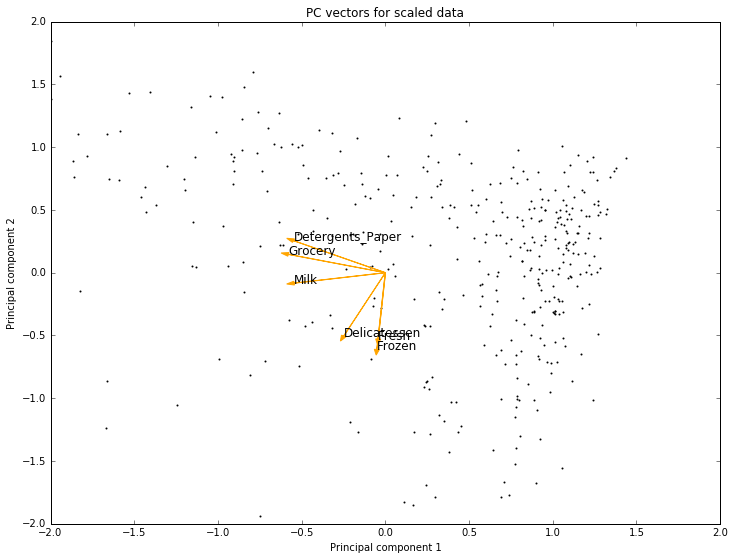

In [186]:
# Principal components plot
def plot_pcs(plot_data, vector_scale, arrow_width, x_min, x_max, y_min, y_max, title):
    pca = PCA(n_components=2).fit(plot_data)
    ax = pd.DataFrame(pca.transform(plot_data),
                 columns=["Principal component 1", "Principal component 2"]).plot(
    kind="scatter",
    x="Principal component 1", y="Principal component 2", s=1, title=title)
    for i, (pc1, pc2) in enumerate(zip(pca.components_[0], pca.components_[1])):
        ax.arrow(0, 0, pc1*vector_scale, pc2*vector_scale, width=arrow_width, fc="orange", ec="orange")
        ax.annotate(data.columns[i], (pc1*vector_scale, pc2*vector_scale), size=12)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
# Scaled
data_scaled = preprocessing.scale(data)
plot_pcs(data_scaled, 1, 0.0015, -2, 2, -2, 2, "PC vectors for scaled data")

Answer: 
The plot above shows feature vectors on 2D plane where x axis is the first principal component and y axis is the second principal component. The first PC corresponds to a line that passes through the multidimensional mean and minimizes the sum of squares of the distances of the points from the line, the second PC corresponds to the same concept and is orthogonal to the first PC.<br>
These principal components represent two artificial features or dimensions created from original features of the dataset. The feature reduction will simplify future analysis and clustering of the dataset.<br>
In this case the first component gives higher weight to "Grocery", "Milk" and "Detergents_Paper" features. The second component places more weight on “Fresh”, “Frozen” and “Delicatessen”. This means that a store that sells fresh and frozen products probably won’t sell as much groceries or detergents and vice versa.

###ICA

In [73]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
ica

def fit_ica(data, random_state):
    ica = FastICA(n_components=data.shape[1], random_state=random_state)
    ica.fit(data)
    ica_components = pd.DataFrame(ica.components_)
    ica_components.columns = ["Fresh", "Milk", "Grocery", "Frozen", 
                          "Detergents_Paper", "Delicatessen"]
    return ica_components

# Print the independent components
ica_components = fit_ica(data_scaled, 777)
print ica_components

      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0 -0.001936 -0.072593  0.055100  0.001769         -0.015715      0.017071
1 -0.004881 -0.001618 -0.005714 -0.002532          0.002434      0.050966
2 -0.002673  0.013988 -0.060280 -0.002041          0.003012      0.003994
3 -0.010931 -0.001033  0.007351  0.054049         -0.002652     -0.016768
4  0.050225 -0.006320 -0.005836 -0.003289          0.009719     -0.002954
5 -0.003810  0.016886  0.114882 -0.007081         -0.134369     -0.016155


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

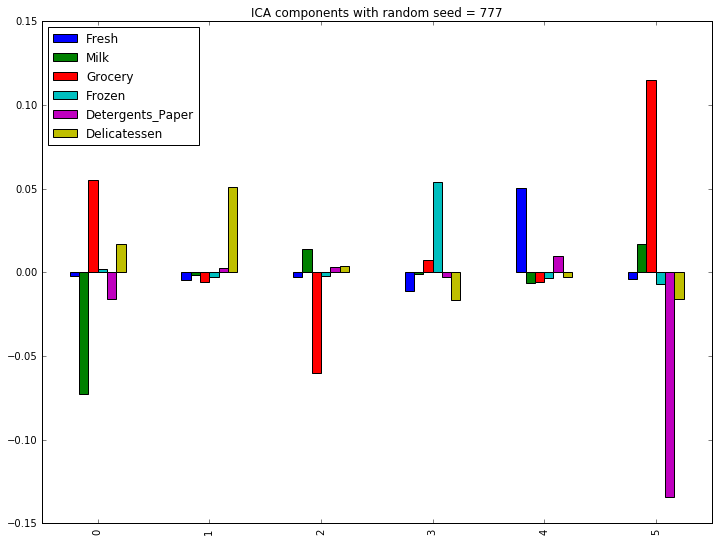

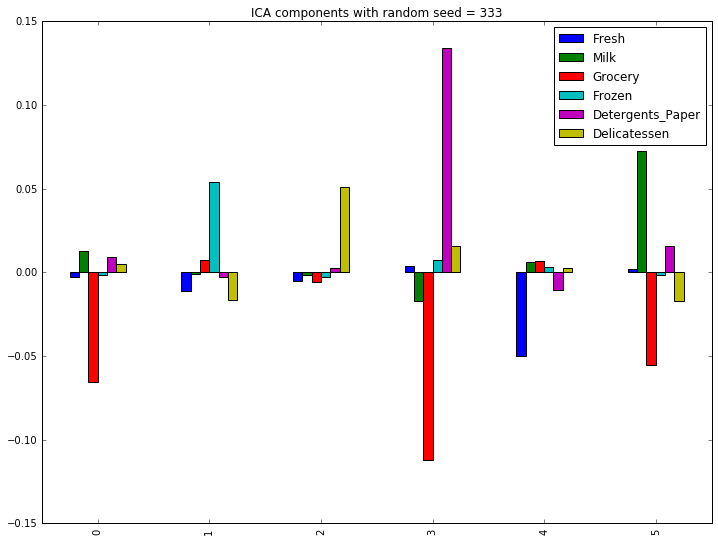

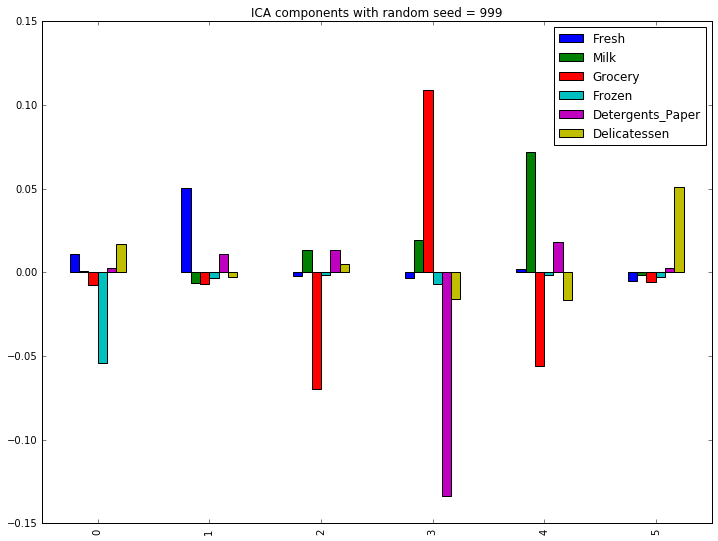

In [85]:
ax = ica_components.plot(kind="bar", title="ICA components with random seed = 777")
ax = fit_ica(data_scaled, 333).plot(kind="bar", title="ICA components with random seed = 333")
ax = fit_ica(data_scaled, 999).plot(kind="bar", title="ICA components with random seed = 999")

Answer: 
Each vector represents relative consumption of different types of products by a group of customers. The bar plots above show that IC vectors’ sign and order changes when fitting ICA with different random states. <br>
On the last graph:
<ul>
    <li>
    Vector 0: Negative corellation between [Frozen, Grocery] and [Fresh, Delicatessen, Detergents]. 
    </li>
    <li>
    Vector 1: [Fresh, Detergents] vs [Milk, Grocery, Frozen, Delicatessen]
    </li>
    <li>
    Vector 2: [Grocery] vs [Milk, Detergents, Delicatessen]
    </li>
    <li>
    Vector 3: [Grocery, Milk] vs [Detergents, Delicatessen]
    </li>
    <li>
    Vector 4: [Milk, Detergents] vs [Grocery, Delicatessen]
    </li>
    <li>
    Vector 5: [Delicatessen] vs [Grocery, Fresh]
    </li>
</ul>

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: The KMeans algorithm scales well to large number of samples and has been used across a large range of application areas in many different fields. Given enough time, K-means will always converge and it is the simplest clustering algorithm.<br>
Gaussian Mixture Models generilize K-means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians. Mixture models tend to have higher density clusters and use soft classification.<br>
Since the dataset even in reduced form has a large amount of outliers, Mixture Model clustering might be a better choice.

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [95]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [132]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_scaled)
print reduced_data[:10]  # print upto 10 elements

[[-0.19329055  0.30509996]
 [-0.4344199   0.32841262]
 [-0.81114323 -0.8150957 ]
 [ 0.77864783 -0.65275373]
 [-0.16628726 -1.27143372]
 [ 0.15616993  0.29514099]
 [ 0.3352884   0.52500326]
 [-0.14058643  0.23099269]
 [ 0.51731954  0.65936283]
 [-1.59210908  0.74101133]]


GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)

Centroids:
[[ 0.46035114  0.09287265]
 [-2.48123321 -0.50057157]]

Random samples with predicted labels:
        PC1       PC2
0  0.860869  0.503650
0  0.377232 -1.425850
0  1.089608  0.236577
0  0.433582 -1.266696
0  0.815267  0.420043
0  0.918023  0.030047
0  0.509445  0.870788
0  0.530430  0.277293
0  0.917999  0.129404
0  0.334660  0.736190
0  1.058913 -0.520147
0 -0.439852 -0.396311
0  0.483730  1.205705
0  1.264968  0.735767
1 -3.238021  0.224516
1 -3.597905  1.239366
0  0.243952 -0.873840
1 -1.665970 -1.237723
0 -0.747268  0.214671
0  0.298085 -1.785491

BIC score:
2597.74316414


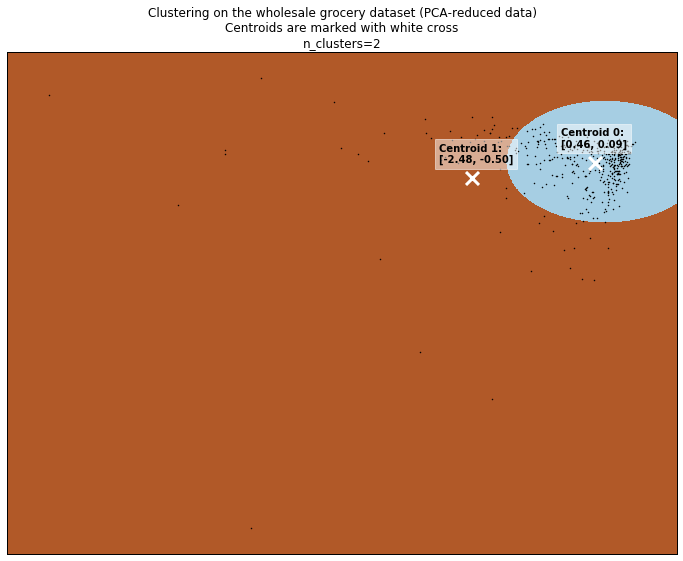

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=3, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)

Centroids:
[[ 0.81499208 -0.09020858]
 [-2.87924272 -1.70246154]
 [-0.73775307  0.63075796]]

Random samples with predicted labels:
        PC1       PC2
0  0.821760  0.807342
0  0.250713 -0.862381
2 -3.206378  0.346680
0  0.686934  0.712621
2 -0.316562  0.290673
0  0.228970 -0.907521
0  0.825755 -0.027340
0  0.871955  0.438404
0  0.788683  0.713826
0  1.223102  0.802181
2 -0.430077  0.503384
0  0.886513 -0.310183
0  1.002308 -0.313410
0  1.368535  0.806513
2  0.253216  0.932818
0  1.079002  0.536968
0  1.111742  0.426236
0  1.158098  0.372054
1 -4.599756  1.236376
1 -0.021617 -3.168049

BIC score:
2406.15604111


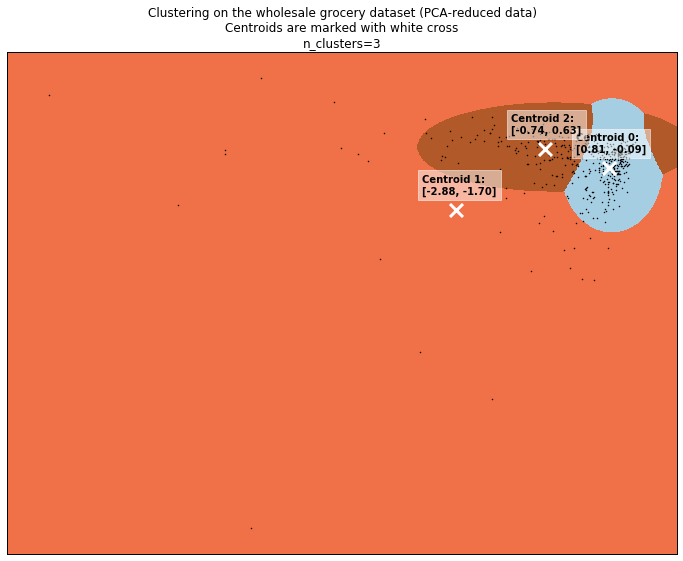

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=4, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)

Centroids:
[[ 0.82543271 -0.0898432 ]
 [-0.68075339  0.6174958 ]
 [-1.18284972 -2.89408021]
 [-5.93037626  1.01999295]]

Random samples with predicted labels:
        PC1       PC2
1 -0.739119  0.811077
0  0.522276 -2.025089
1 -0.030649  0.308468
0  0.902520 -1.676916
0  1.279453  0.273926
2  0.444901 -4.417974
0  0.763179  0.843002
1 -1.530659  1.427848
1 -0.167248  1.074397
0  0.776394 -1.520253
0  1.078199  0.335335
0  0.815267  0.420043
1 -1.998211  1.845362
0  0.917999  0.129404
0  1.069082  0.801597
0  1.344622  0.765305
0  1.103379  0.071858
0  0.778151 -0.731077
0  0.706259 -2.186278
1 -0.439852 -0.396311

BIC score:
2415.19548852


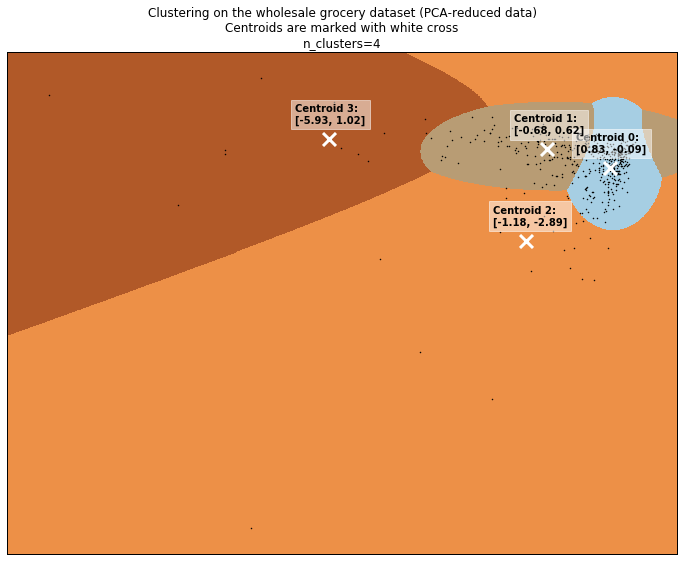

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=5, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)

Centroids:
[[ 0.96305976  0.10054935]
 [-5.98328629  1.0231009 ]
 [ 0.13352904 -0.7949861 ]
 [-0.82036226  0.78726679]
 [-3.91274521 -6.5948516 ]]

Random samples with predicted labels:
        PC1       PC2
0  0.962230  0.018989
2  0.298085 -1.785491
0  0.860869  0.503650
3  0.034866  0.413841
3 -0.912613  0.708378
0  1.089608  0.236577
1 -8.430925  0.592369
2  0.420393 -1.029406
0  1.209526  0.276473
0  0.860869  0.503650
0  1.200060  0.451152
0  0.993347  0.021238
0  0.812230 -0.624447
0  0.911158 -0.080873
0  0.763179  0.843002
3 -0.042177  0.670037
3  0.334660  0.736190
2 -0.529385 -2.536284
2  0.738136 -1.773376
0  0.845501  0.176852

BIC score:
2308.20559765


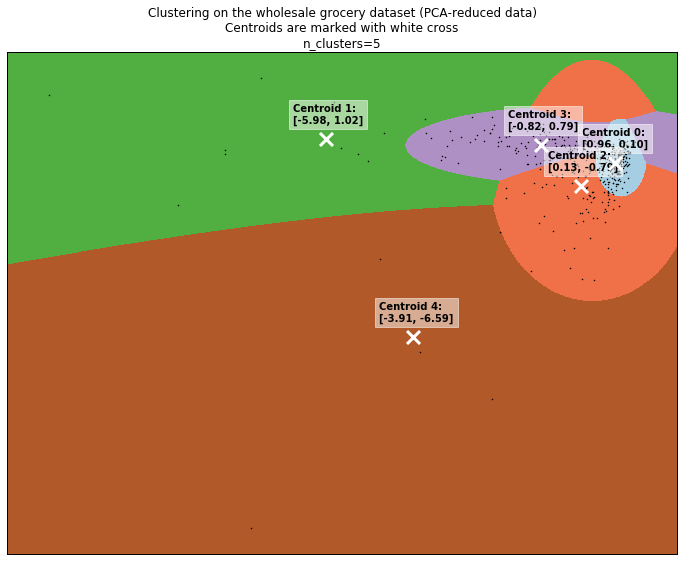

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=6, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)

Centroids:
[[-0.18355794  0.54432561]
 [-1.89225221  1.0121109 ]
 [ 0.13290071 -1.12014212]
 [ 0.96919916  0.09021055]
 [-4.14482828 -6.90399737]
 [-7.46657766  1.07576398]]

Random samples with predicted labels:
        PC1       PC2
3  1.040817  0.446826
4 -4.685654 -3.598678
3  1.132441  0.240935
3  0.981723 -0.948934
2 -0.316579 -0.442066
3  0.594901  0.242309
3  0.953507  0.502665
0  0.509445  0.870788
4 -2.014356 -9.005487
0  0.047589  0.619165
3  1.239812  0.801270
2  0.261167 -0.928149
0 -0.030649  0.308468
3  0.871955  0.438404
3  1.105137  0.861338
3  0.993347  0.021238
1 -3.206378  0.346680
3  1.103379  0.071858
0 -0.238008  0.027006
5 -8.430925  0.592369

BIC score:
2310.29118747


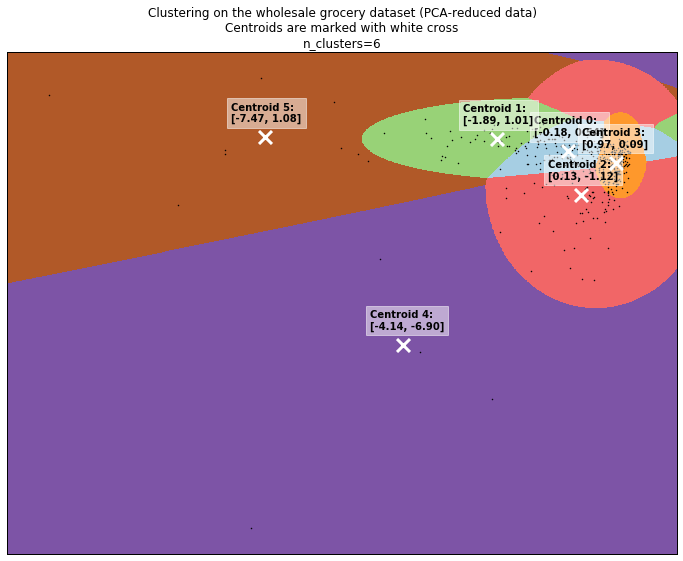

In [196]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'
def plot_clusters(data, n_clusters):
    clusters = GMM(n_components=n_clusters).fit(data)
    print clusters
    # Plot the decision boundary by building a mesh grid to populate a graph.
    x_min, x_max = reduced_data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, data[:, 1].max() + 1
    hx = (x_max-x_min)/1000.
    hy = (y_max-y_min)/1000.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))
    # Obtain labels for each point in mesh. Use last trained model.
    Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])
    # TODO: Find the centroids for KMeans or the cluster means for GMM 
    centroids = clusters.means_
    print "\nCentroids:"
    print centroids
    # Predict 20 random samples
    print "\nRandom samples with predicted labels:"
    samples = data[np.random.randint(len(data), size=20)]
    samples = pd.DataFrame(samples)
    samples.index = clusters.predict(samples)
    samples.columns = ["PC1", "PC2"]
    print samples
    # bic score
    print "\nBIC score:"
    print clusters.bic(data)
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
    for i in range(n_clusters):
        x = centroids[i][0]
        y = centroids[i][1]
        txt = "Centroid {0}:\n[{1:0.2f}, {2:0.2f}]".format(i, x, y)
        plt.annotate(txt, (x-0.8, y+0.6), size=10, weight="bold", backgroundcolor=(1,1,1,0.5))
    plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross\nn_clusters={0}'.format(n_clusters))
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()
    
plot_clusters(reduced_data, 2)
plot_clusters(reduced_data, 3)
plot_clusters(reduced_data, 4)
plot_clusters(reduced_data, 5)
plot_clusters(reduced_data, 6)

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: Central objects for the model with 4 clusters:
<ul>
    <li>
    Centroid 0 (PC1=0.83, PC2=-0.09): High amount of "Delicatessen", "Frozen" and "Fresh" orders. This cluster seems to represent grocery stores or supermarkets. 
    </li>
    <li>
    Centroid 3 (PC1=-0.68, PC2=0.62): High amount of "Detergents_Paper", "Grocery" and "Milk" orders. Smaller grocery and convenience stores.
    </li>
    <li>
    Centroid 2 (PC1=-1.18, PC2=-2.89): Mixed products in large amounts - large supermarkets.
    </li>
    <li>
    Centroid 1 (PC1=-5.93, PC2=1.02): Small convenience stores.
    </li>
<ul>

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: The PCA helped to reduce the dimensionality of the original dataset to 2 features. Then GMM was used to find different clusters of customers based on the reduced dataset. <br>The PCA analysis was very insightful and reviled main sources of variation in the dataset which then were used by GMM in order to identify additional segments.

**9)** How would you use that technique to help the company design new experiments?

Answer: The results of the clustering can be used for A/B testing of particular segments. In A/B test, two versions (A and B) are compared, which are identical except for one variation that might affect a customer's behavior. In this case this technique might be used for price adjustment in order to maximize margins across different customer segments.

**10)** How would you use that data to help you predict future customer needs?

Answer: The results of the PCA and GMM analysis can be used in order to narrow down datasets for future experiments concentrated on particular customer segments. Then supervised learning can be applied to a segment in order to predict future customer needs by associating amount of sold products with different features of the customers (store location, number of employees, etc.). The results can then be used to adjust prices for different type of products in order to satisfy all target sectors while maintaining high margins. This technique is called Dynamic Pricing https://en.wikipedia.org/wiki/Dynamic_pricing.